In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')


In [2]:
house = pd.read_csv('./datasets/house_almost_clean.csv')

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2051 non-null   int64  
 1   ms_subclass      2051 non-null   int64  
 2   ms_zoning        2051 non-null   object 
 3   lot_frontage     2051 non-null   float64
 4   lot_area         2051 non-null   int64  
 5   street           2051 non-null   object 
 6   alley            2051 non-null   object 
 7   lot_shape        2051 non-null   object 
 8   land_contour     2051 non-null   object 
 9   utilities        2051 non-null   object 
 10  lot_config       2051 non-null   object 
 11  land_slope       2051 non-null   object 
 12  neighborhood     2051 non-null   object 
 13  condition_1      2051 non-null   object 
 14  condition_2      2051 non-null   object 
 15  bldg_type        2051 non-null   object 
 16  house_style      2051 non-null   object 
 17  overall_qual  

In [4]:
'order', 'year_bulit', 'bsmt_unf_sf_1', 'bsmt_unf_sf_2', 'bedroom', 'kitchen', 'totrmsabvgrdfireplaces'

('order',
 'year_bulit',
 'bsmt_unf_sf_1',
 'bsmt_unf_sf_2',
 'bedroom',
 'kitchen',
 'totrmsabvgrdfireplaces')

In [5]:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 60)

In [6]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = ('20,15')

In [7]:
#the features that has correlation within the benchmark given with sale price
corr_1 = house.corr()['saleprice']
feature_index = list(corr_1[(corr_1 > 0.6) | (corr_1 < -0.6)].index)
feature_index

['overall_qual',
 'exter_qual',
 'bsmt_qual',
 'total_bsmt_sf',
 '1st_flr_sf',
 'gr_liv_area',
 'kitchen_qual',
 'garage_cars',
 'garage_area',
 'saleprice']

<AxesSubplot:>

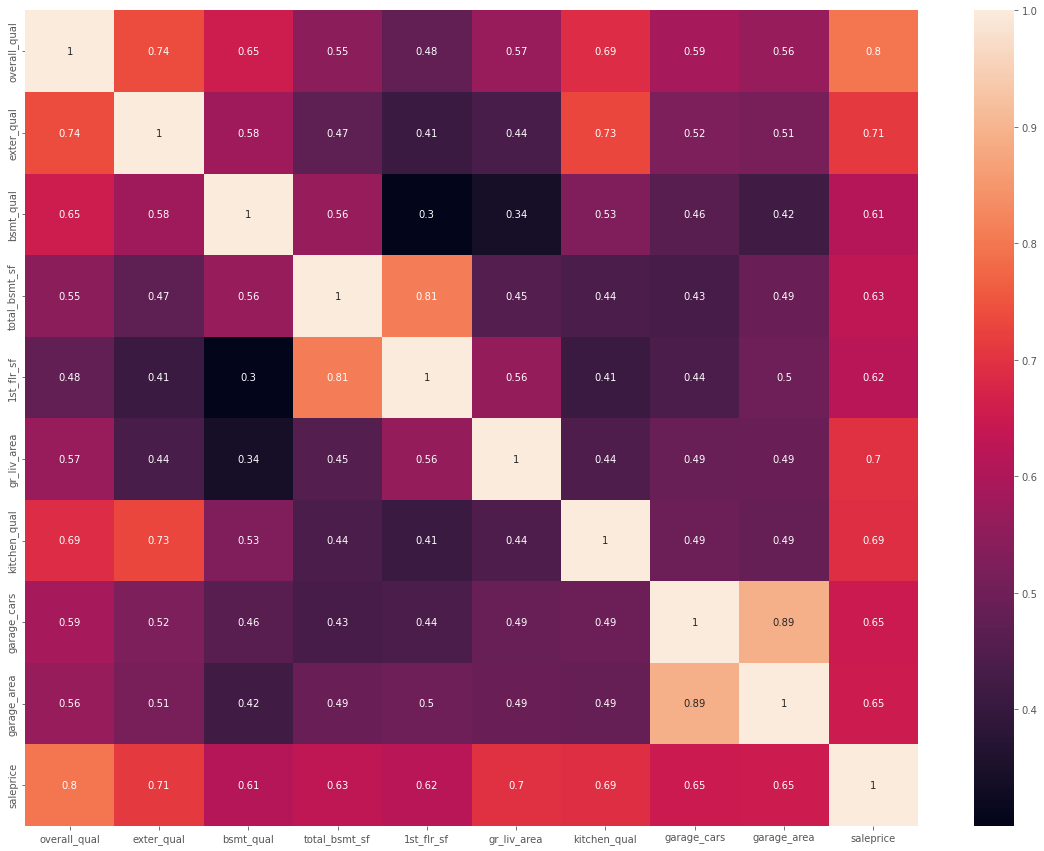

In [8]:
#to visualise the feature index in a heatmap
house_corr = house[feature_index].corr()
sns.heatmap(house_corr, annot = True)

In [9]:
# a quick glance to see how the features are related to the sale price
# sns.pairplot(house[feature_index])

In [10]:
house.describe()

,Unnamed: 0,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1025.000000,57.008776,68.885422,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,3.406143,3.085812,3.490005,2.929303,1.628961,3.024378,442.264261,1.222818,47.935641,567.682838,1057.956850,4.158459,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,3.517309,6.435885,0.590931,1.763530,1978.779620,1.158459,1.776694,473.674793,2.803023,2.810336,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,0.015115,0.274500,51.574354,6.219893,2007.775719,181469.701609
std,592.217021,42.824223,21.309886,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,0.587962,0.372792,0.901637,0.572009,1.079440,1.676346,461.094540,0.768010,164.964052,444.851010,449.303265,0.964112,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,0.665577,1.560225,0.638516,1.807074,24.725364,1.142846,0.764367,215.881933,0.721253,0.716094,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,0.236366,0.598558,573.393985,2.744736,1.312014,79258.659352
min,0.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,512.500000,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,220.000000,793.000000,3.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1962.000000,0.000000,1.000000,319.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1025.000000,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,3.000000,368.000000,1.000000,0.000000,474.500000,994.500000,5.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,1.000000,1980.000000,1.000000,2.000000,480.000000,3.000000,3.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1537.500000,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,4.000000,3.000000,

In [11]:
house.columns
house.drop(['Unnamed: 0'], axis = 1,inplace = True)

My EDA will be directed to the factors based on the research and towards selecting the features for modelling. These factors are neighbourhood composition, location, home size and usable space, age and condition, upgrades and updates of the home (homeia.com, 2021). Other factors will be overall quality, exterior quality, basement quality, total basement area, 1st floor area, above grade living area, kitchen quality and size of garage in car capacity.

<AxesSubplot:xlabel='saleprice'>

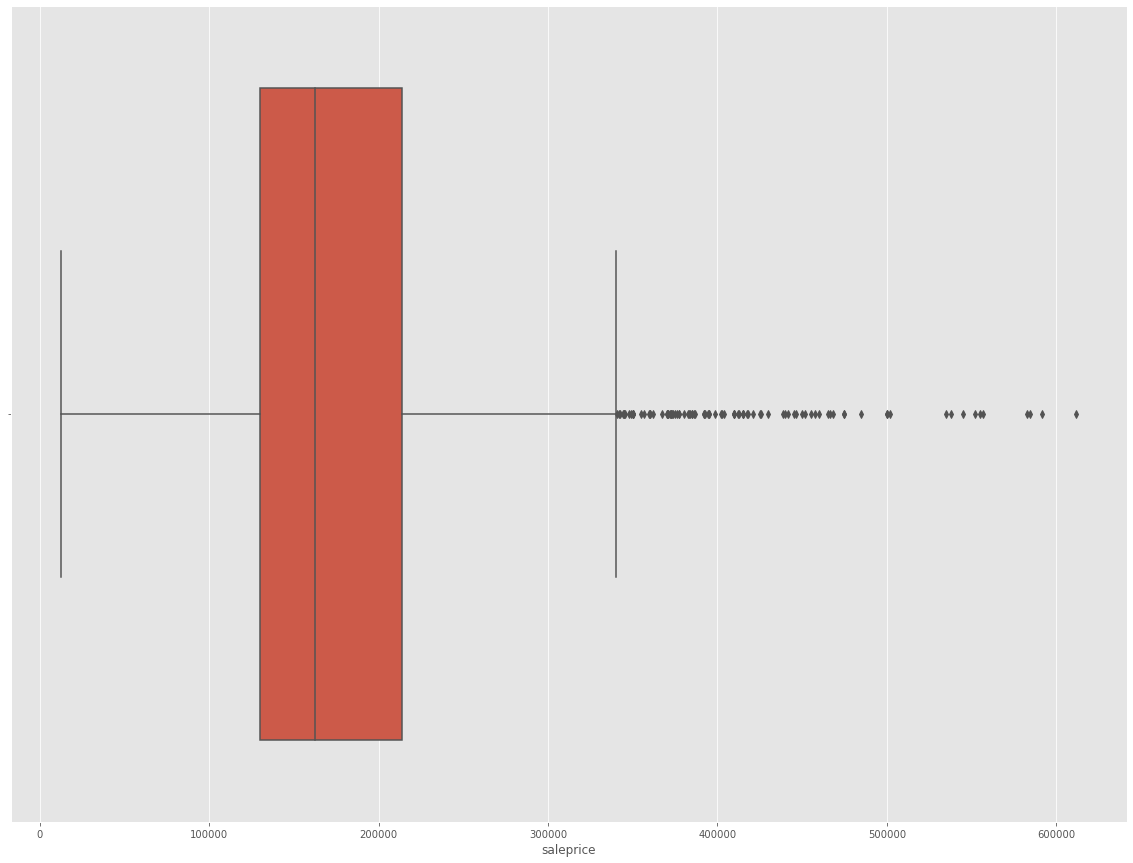

In [12]:
#see for any outliers for sale price
sns.boxplot(house.saleprice, orient = 'V')

I can see a considerable amount of outliers from the sale price which may mean that buyers may have over paid or paid accordingly due to the certain conditions of the house.

In [13]:
# to see the relation between neighbourhood composition and sale price
house[['neighborhood','saleprice']].sort_values('saleprice', ascending = False).head(10)

,neighborhood,saleprice
1671,NridgHt,611657
1964,StoneBr,591587
1692,NoRidge,584500
1796,NridgHt,582933
151,StoneBr,556581
1164,NridgHt,555000
623,NridgHt,552000
138,StoneBr,545224
823,StoneBr,538000
1592,StoneBr,535000


In [14]:
house[['neighborhood','saleprice']].sort_values('saleprice', ascending = False).tail(10)

,neighborhood,saleprice
1089,OldTown,45000
103,IDOTRR,44000
408,IDOTRR,40000
1428,BrkSide,39300
1564,OldTown,37900
1518,IDOTRR,35311
1292,Edwards,35000
1309,IDOTRR,34900
183,IDOTRR,13100
1628,OldTown,12789


Here we can tell that there are similar neighbourhoods that fetch a high sale price and lower sale price. Northridge Heights and Stonebrook neighborhoods fetch the top 10 highest prices. Where else, Old Town, Iowa DOT and rail road, Brookside and Edwards for the bottom 10. It could mean that neighbourhood locations plays an important part in the value of the house.

<AxesSubplot:xlabel='saleprice', ylabel='neighborhood'>

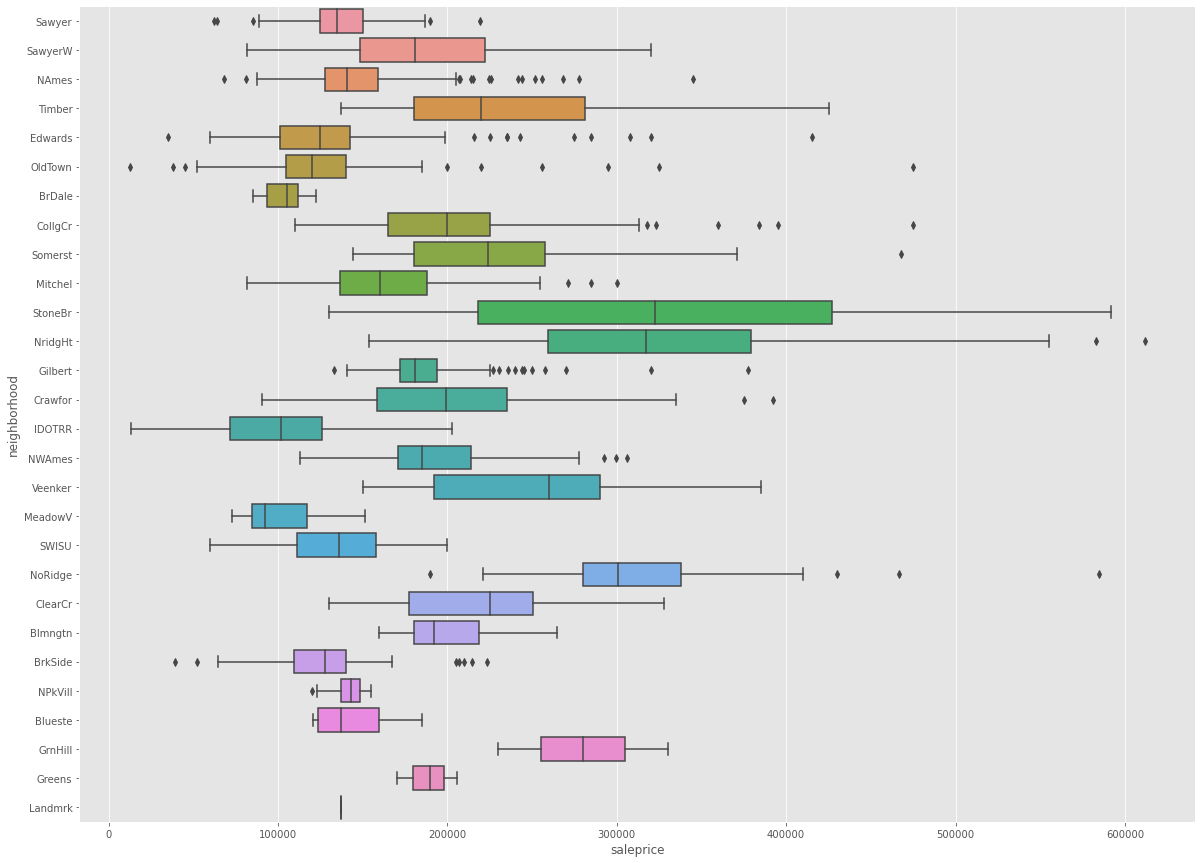

In [15]:
#to see the range of home values within a neighbourhood
sns.boxplot(data = house, x = 'saleprice', y = 'neighborhood', orient = 'h',)

We can see the the variance in the boxplot. It shows the range where the neighborhood houses are valued. This will be a good feature to use in the model.

***Exploring nominal columns***

In [16]:
#for reference

total_nominal=[
    'pid',
    'ms_subclass',
    'ms_zoning',
    'street',
    'alley',
    'land_contour',
    'lot_config',
    'neighborhood',
    'condition_1',
    'condition_2',
    'Bldg Type',
    'house_style',
    'roof_style',
    'roof_matl',
    'exterior_1',
    'exterior_2',
    'mas_vnr_type',
    'foundation',
    'heating',
    'central_air',
    'garage_type',
    'misc_feature',
    'sale_condition',
]

total_ordinal = [
    'lot_shape',
    'utilities',
    'land_slope',
    'overall_qual',
    'overall_cond',
    'exter_qual',
    'exter_cond',
    'bsmt_qual',
    'bsmt_cond',
    'bsmt_exposure',
    'bsmtfin_type_1',
    'bsmtfin_type_2',
    'heating_qc',
    'electrical',
    'kitchen_qual',
    'functional',
    'fireplacequ',
    'garage_fninsh',
    'garage_qual',
    'garage_cond',
    'paved_drive',
    'pool_qc',
    'fence',
]

total_numerical = [
    'order',
    'lot_frontage',
    'lot_area',
    'year_built',
    'year_remod/add',
    'mas_vnr_area',
    'bsmtfin_type_1',
    'bsmtfin_type_2',
    'bsmt_unf_sf_1',
    'bsmt_unf_sf_2',
    'total_bsmt_sf',
    '1st_flr_sf',
    '2nd_flr_sf',
    'low_qual_fin_sf',
    'gr_liv_area',
    'bsmt_full_bath',
    'bsmt_half_bath',
    'full_bath',
    'bedroom',
    'kitchen',
    'totrmsabvgrd'
    'fireplaces',
    'garage_yr_built',
    'garage_cars',
    'garage_area',
    'wood_deck_sf',
    'open_porch_sf',
    'enclosed_porch_sf',
    '3ssn_porch',
    'screen_porch',
    'pool_area',
    'misc_val',
    'mo_sold',
    'yr_sold',   
]

In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2051 non-null   int64  
 1   ms_zoning        2051 non-null   object 
 2   lot_frontage     2051 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   street           2051 non-null   object 
 5   alley            2051 non-null   object 
 6   lot_shape        2051 non-null   object 
 7   land_contour     2051 non-null   object 
 8   utilities        2051 non-null   object 
 9   lot_config       2051 non-null   object 
 10  land_slope       2051 non-null   object 
 11  neighborhood     2051 non-null   object 
 12  condition_1      2051 non-null   object 
 13  condition_2      2051 non-null   object 
 14  bldg_type        2051 non-null   object 
 15  house_style      2051 non-null   object 
 16  overall_qual     2051 non-null   int64  
 17  overall_cond  

In [18]:
#combining features that are similar
# house['total_bath'] = house['full_bath'] + house['half_bath']
# house.drop(['full_bath','half_bath','bsmt_full_bath',
#     'bsmt_half_bath',], axis = 1, inplace= True)


In [19]:
# house.drop(['full_bath','half_bath','bsmt_full_bath',
#     'bsmt_half_bath',], axis = 1, inplace= True)

In [20]:
#dropping garage_cars due to multicollinearity
house.drop('garage_cars', axis = 1, inplace = True)

In [21]:
#dropping 1st_flr_sq as it has a 0.81 correlation with total_bsmt_sf
# house.drop('1st_flr_sf', axis = 1, inplace = True)
house.drop('2nd_flr_sf', axis = 1, inplace = True)

<AxesSubplot:>

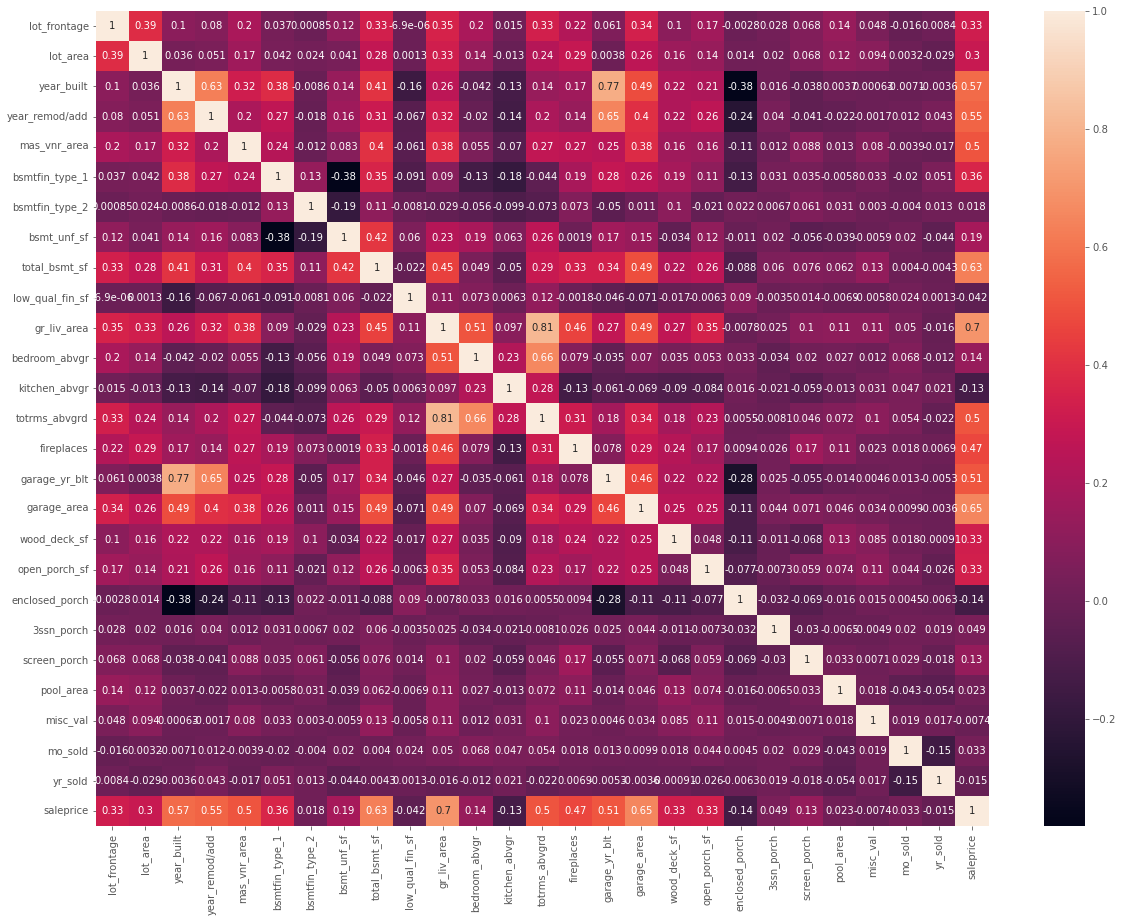

In [22]:
numerical_corr = house[[
    'lot_frontage',
    'lot_area',
    'year_built',
    'year_remod/add',
    'mas_vnr_area',
    'bsmtfin_type_1',
    'bsmtfin_type_2',
    'bsmt_unf_sf',
    'total_bsmt_sf',
    'low_qual_fin_sf',
    'gr_liv_area',
    'bedroom_abvgr',
    'kitchen_abvgr',
    'totrms_abvgrd',
    'fireplaces',
    'garage_yr_blt',
    'garage_area',
    'wood_deck_sf',
    'open_porch_sf',
    'enclosed_porch',
    '3ssn_porch',
    'screen_porch',
    'pool_area',
    'misc_val',
    'mo_sold',
    'yr_sold',
    'saleprice'
]].corr()
sns.heatmap(numerical_corr, annot = True) #checking for mulitcollinearity

In [23]:
house.shape

(2051, 77)

<AxesSubplot:>

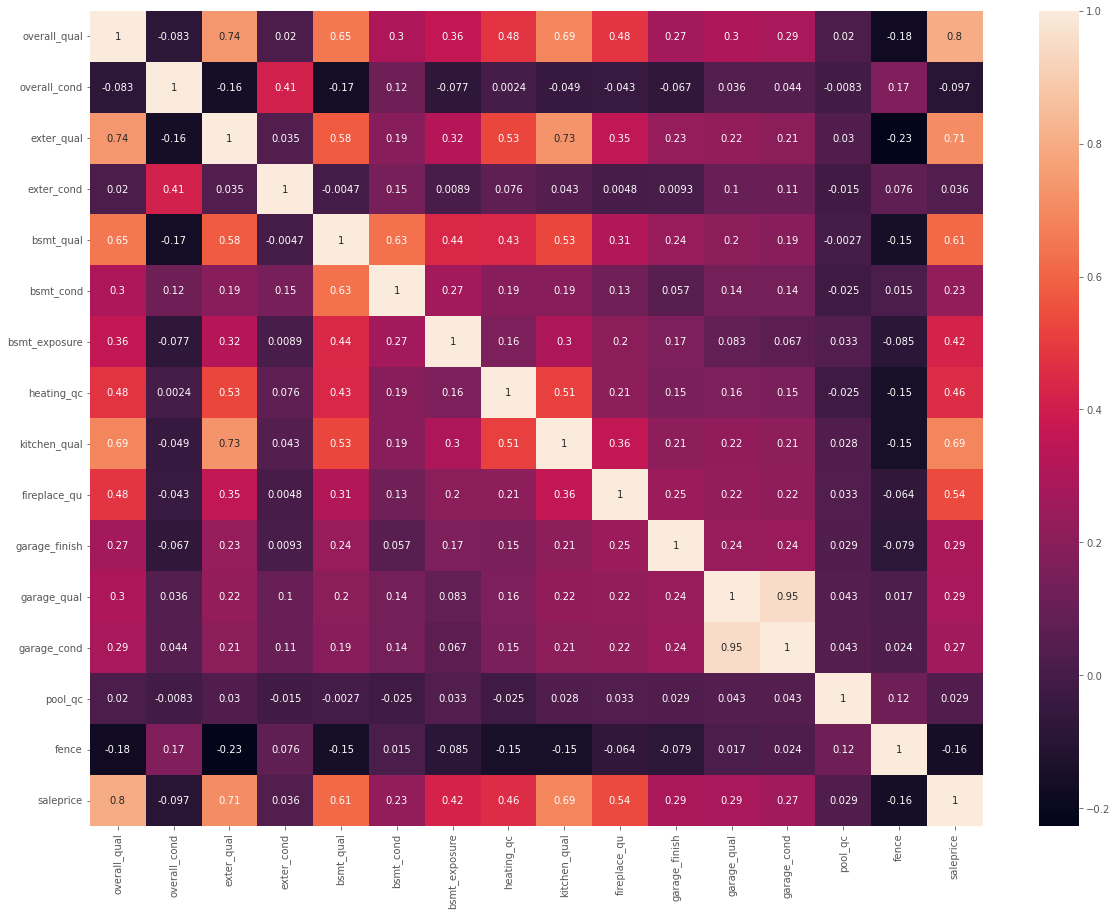

In [24]:
ordinal_corr = house[[
    'lot_shape',
    'utilities',
    'land_slope',
    'overall_qual',
    'overall_cond',
    'exter_qual',
    'exter_cond',
    'bsmt_qual',
    'bsmt_cond',
    'bsmt_exposure',
    'heating_qc',
    'electrical',
    'kitchen_qual',
    'functional',
    'fireplace_qu',
    'garage_finish',
    'garage_qual',
    'garage_cond',
    'paved_drive',
    'pool_qc',
    'fence',
    'saleprice',
]].corr()
sns.heatmap(ordinal_corr, annot = True)

In [25]:
#dropped due to multicollinearity
house.drop(['kitchen_qual'],axis = 1, inplace = True)

# Model Preprocessing

In [26]:
# get.dummies on selected categorical features
pd.get_dummies(house,columns = ['neighborhood'], drop_first = True)
print(house)

      ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
0              60        RL          68.0     13517   Pave  Grvl       IR1   
1              60        RL          43.0     11492   Pave  Grvl       IR1   
2              20        RL          68.0      7922   Pave  Grvl       Reg   
3              60        RL          73.0      9802   Pave  Grvl       Reg   
4              50        RL          82.0     14235   Pave  Grvl       IR1   
...           ...       ...           ...       ...    ...   ...       ...   
2046           20        RL          79.0     11449   Pave  Grvl       IR1   
2047           30        RL          68.0     12342   Pave  Grvl       IR1   
2048           50        RL          57.0      7558   Pave  Grvl       Reg   
2049           20        RL          80.0     10400   Pave  Grvl       Reg   
2050           60        RL          60.0      7500   Pave  Grvl       Reg   

     land_contour utilities lot_config land_slope neighborhood 

In [27]:
X = house[[
    'overall_qual',
     'exter_qual',
     'bsmt_qual',
     'total_bsmt_sf',
     'gr_liv_area',
     'garage_area']]

In [28]:
y = house['saleprice'].map(np.log2)

In [29]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,)

In [30]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [31]:
lr = LinearRegression()
lr.fit(X_train_sc,y_train)

LinearRegression()

In [32]:
lr.score(X_train_sc,y_train)

0.8001647452433556

In [33]:
lr.score(X_test_sc,y_test)

0.8126819578963208

In [34]:
#lasso train
lasso = LassoCV(n_alphas=200)
lasso.fit(X_train_sc,y_train)
lasso.score(X_train_sc,y_train)

0.8001357812410915

In [35]:
#lasso test
lasso = LassoCV(n_alphas=200)
lasso.fit(X_test_sc,y_test)
lasso.score(X_test_sc,y_test)

0.8239064848396804

In [36]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge.fit(X_train_sc,y_train)
ridge.score(X_train_sc,y_train)

0.8001559053197954

In [37]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge.fit(X_test_sc,y_test)
ridge.score(X_test_sc,y_test)

0.8237930030821995

All the scores have similar range which means the model is a good fit.

# Cross Val Score

In [38]:
lr_scores = cross_val_score(lr,X_train_sc,y_train,cv= 5)
lr_scores.mean()

0.7891051815997494

In [39]:
lasso = LassoCV(n_alphas=200)
lasso_scores = cross_val_score(lasso,X_train_sc,y_train,cv= 5)
lasso_scores.mean()

0.789279338831067

In [40]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge_scores = cross_val_score(ridge,X_train_sc,y_train,cv= 5)
ridge_scores.mean()

0.7892642627981689

***Model Selection***

Decided to go with lasso model based on the lr score.

In [46]:
#predictions
test_predict = pd.read_csv("./datasets/test.csv")
#change column names to snake case
test_predict.columns = test_predict.columns.str.lower().str.replace(' ','_')

In [54]:
results = lr.predict(test_predict)

results_df = test_set[["id"]].merge(
    pd.DataFrame(results), left_index=True, right_index=True)
results_df.to_csv("predictions.csv", header=["Id", "SalePrice"], index=False)

ValueError: could not convert string to float: 'RM'